In [25]:
import pandas as pd
import numpy as np
import toad
# https://toad.readthedocs.io/en/latest/tutorial_chinese.html

In [26]:
data = pd.read_csv('../data/GermanCredit/german_credit_data.csv')
print('Shape:',data.shape)
data.head(10)

Shape: (1000, 11)


,index,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,male,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,1
5,5,35,male,1,free,NaN,NaN,9055,36,education,0
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,0
7,7,35,male,3,rent,little,moderate,6948,36,car,0
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,0
9,9,28,male,3,own,little,moderate,5234,30,car,1


In [27]:
# 将数据分割成训练集的比例
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42,stratify=data['Risk'])
print('train_set:',train_set.shape,",test_set:",test_set.shape)

train_set: (800, 11) ,test_set: (200, 11)


In [28]:
toad.detect(train_set)[:10]

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
index,int64,800,0.00%,800,500.0475,287.802407,0.0,11.98,100.9,495.5,748.25,901.1,987.01,999.0
Age,int64,800,0.00%,53,35.32375,11.045313,19.0,20.0,24.0,33.0,41.0,51.0,66.01,75.0
Sex,object,800,0.00%,1,male:100.00%,None,None,None,None,None,None,None,None,male:100.00%
Job,int64,800,0.00%,4,1.90625,0.642633,0.0,0.0,1.0,2.0,2.0,3.0,3.0,3.0
Housing,object,800,0.00%,3,own:71.25%,rent:18.00%,free:10.75%,None,None,None,None,own:71.25%,rent:18.00%,free:10.75%
Saving accounts,object,800,18.00%,4,little:59.38%,moderate:11.25%,quite rich:6.25%,rich:5.12%,None,None,little:59.38%,moderate:11.25%,quite rich:6.25%,rich:5.12%
Checking account,object,800,39.50%,3,little:27.38%,moderate:26.75%,rich:6.38%,None,None,None,None,little:27.38%,moderate:26.75%,rich:6.38%
Credit amount,int64,800,0.00%,746,3189.59125,2673.54737,276.0,425.83,914.4,2317.0,3933.0,7064.0,12682.96,15945.0
Duration,int64,800,0.00%,31,20.77,11.817325,4.0,6.0,9.0,18.0,24.0,36.0,60.0,60.0
Purpose,object,800,0.00%,8,car:34.75%,radio/TV:26.88%,furniture/equipment:18.62%,business:9.88%,education:5.62%,business:9.88%,education:5.62%,repairs:2.25%,domestic appliances:1.25%,vacation/others:0.75%


In [29]:
# pd.DataFrame.iteritems = pd.DataFrame.items
to_drop = ['index']
np.str = np.str_
toad.quality(data.drop(to_drop,axis=1),'Risk',cpu_cores=1,iv_only=True)
# toad.quality(data, 'Risk',cpu_cores=1, indicators = ['iv'])


,iv,gini,entropy,unique
Checking account,0.666012,NaN,NaN,4.0
Duration,0.354784,NaN,NaN,33.0
Credit amount,0.351455,NaN,NaN,921.0
Age,0.211197,NaN,NaN,53.0
Saving accounts,0.196010,NaN,NaN,5.0
Housing,0.083293,NaN,NaN,3.0
Purpose,0.067309,NaN,NaN,8.0
Job,0.008763,NaN,NaN,4.0
Sex,0.000000,NaN,NaN,1.0


In [47]:
# train_selected, dropped = toad.selection.select(train_set,target = 'Risk', empty = 0.5, iv = 0.05, corr = 0.7, return_drop=True, 
#                                                 exclude=['index','Housing','Saving accounts','Checking account','Purpose'])

train_selected, dropped = toad.selection.select(train_set,target = 'Risk', empty = 0.5, iv = 0.02, corr = 0.7, return_drop=True,
                                                exclude=['index'])
# train_selected, dropped = toad.selection.drop_iv(train_set,target = 'Risk',threshold = 0.2,return_drop = True)
print(dropped)
train_selected

{'empty': array([], dtype=float64), 'iv': array(['Sex', 'Job'], dtype=object), 'corr': array([], dtype=object)}


,index,Age,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
828,828,47,free,NaN,little,8335,36,car,1
997,997,38,own,little,NaN,804,12,radio/TV,0
148,148,28,own,little,little,5371,36,furniture/equipment,0
735,735,29,own,NaN,moderate,3990,36,domestic appliances,0
130,130,24,own,NaN,moderate,8487,48,car,0
...,...,...,...,...,...,...,...,...,...
492,492,27,own,moderate,NaN,1237,6,radio/TV,0
545,545,43,free,little,little,1333,24,car,1
298,298,43,own,little,NaN,2515,18,furniture/equipment,0
417,417,23,rent,NaN,little,8471,18,education,0


In [31]:
np.float = np.float64
# initialise
c = toad.transform.Combiner()
# 使用特征筛选后的数据进行训练：使用稳定的卡方分箱，规定每箱至少有5%数据, 空值将自动被归到最佳箱。
c.fit(train_selected.drop(to_drop, axis=1), y = 'Risk', method = 'chi', min_samples = 0.05) #empty_separate = False

# 为了演示，仅展示部分分箱
# print('Age:',c.export()['Age'])
c.export()

{'Age': [26, 33, 35, 37, 49],
 'Housing': [['own'], ['rent'], ['free']],
 'Saving accounts': [['rich'],
  ['quite rich'],
  ['nan'],
  ['moderate'],
  ['little']],
 'Checking account': [['nan'], ['rich'], ['moderate'], ['little']],
 'Credit amount': [1382, 1778, 2603, 4057],
 'Duration': [9, 12, 13, 16, 21, 36],
 'Purpose': [['radio/TV'],
  ['domestic appliances', 'car'],
  ['furniture/equipment', 'business', 'vacation/others'],
  ['repairs', 'education']]}

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Checking account', ylabel='prop'>

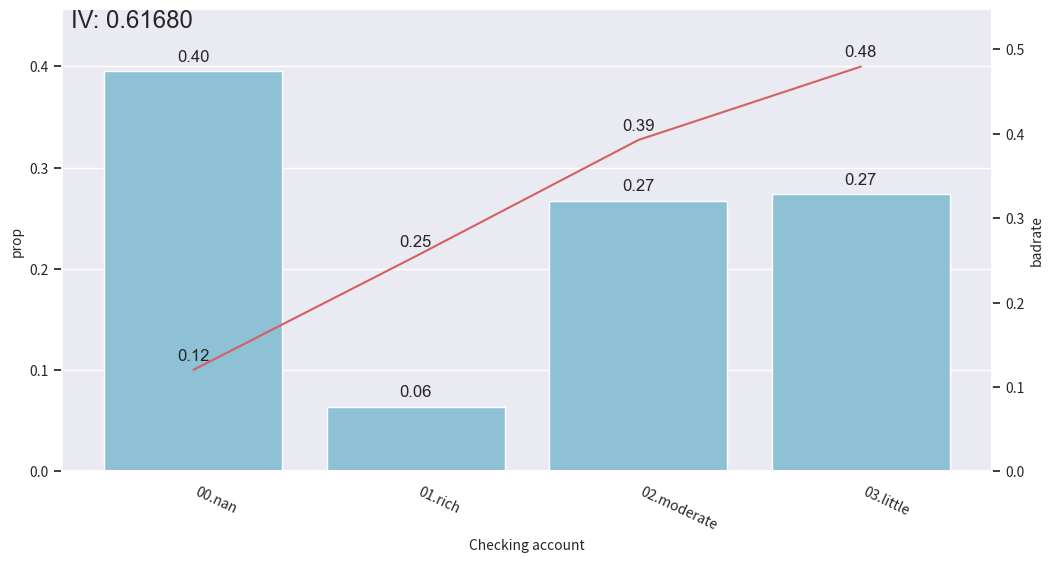

In [32]:
from toad.plot import bin_plot
# 看'var_d2'在时间内的分箱
col = 'Checking account'
pd.option_context('mode.use_inf_as_na', True)
bin_plot(c.transform(train_selected[[col,'Risk']], labels=True), x=col, target='Risk')

In [33]:
# 初始化
transer = toad.transform.WOETransformer()
# combiner.transform() & transer.fit_transform() 转化训练数据，并去掉target列
train_woe = transer.fit_transform(c.transform(train_selected), train_selected['Risk'], exclude=to_drop+['Risk'])
test_woe = transer.transform(c.transform(test_set))

print(train_woe.head(3))
print(test_woe.head(3))



     index       Age   Housing  Saving accounts  Checking account  \
828    828 -0.173537  0.470820        -0.762140          0.765060   
997    997 -0.173537 -0.200495         0.290162         -1.142737   
148    148 -0.086486 -0.200495         0.290162          0.765060   

     Credit amount  Duration   Purpose  Risk  
828       0.525398  0.713766  0.042629     1  
997       0.082177 -0.143101 -0.453959     0  
148       0.525398  0.713766  0.134857     0  
     index       Age   Sex  Job   Housing  Saving accounts  Checking account  \
30      30 -0.797858  male    2 -0.200495        -1.126783           0.41058   
128    128  0.486285  male    3 -0.200495         0.290162           0.41058   
289    289 -0.173537  male    2 -0.200495         0.290162           0.76506   

     Credit amount  Duration   Purpose  Risk  
30        0.060819  0.336472  0.134857     0  
128       0.060819 -0.143101  0.042629     0  
289       0.082177  0.099342 -0.453959     1  


In [34]:
# 将woe转化后的数据做逐步回归
final_data = toad.selection.stepwise(train_woe,target = 'Risk', estimator='ols', direction = 'both', criterion = 'aic', exclude = to_drop)

# 将选出的变量应用于test/OOT数据
final_test_data = test_woe[final_data.columns]

print(final_data.shape) # 逐步回归从31个变量中选出了10个

(800, 9)


In [35]:
# 确定建模要用的变量
col = list(final_data.drop(to_drop+['Risk'],axis=1).columns)
toad.metrics.PSI(final_data[col], final_test_data[col])

Age                 0.051358
Housing             0.000207
Saving accounts     0.037022
Checking account    0.000504
Credit amount       0.010151
Duration            0.006745
Purpose             0.021857
dtype: float64

In [36]:
# 用逻辑回归建模
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(final_data[col], final_data['Risk'])
pred_train = lr.predict_proba(final_data[col])[:,1]

pred_test =lr.predict_proba(final_test_data[col])[:,1]


In [37]:
from toad.metrics import KS, AUC
print('train KS',KS(pred_train, final_data['Risk']))
print('train AUC',AUC(pred_train, final_data['Risk']))

train KS 0.46964285714285714
train AUC 0.7951599702380953


In [38]:
toad.metrics.KS_bucket(pred_train, final_data['Risk'], bucket=10, method = 'quantile')


,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,good_prop,...,cum_bad_rate_rev,cum_bads_prop,cum_bads_prop_rev,cum_goods_prop,cum_goods_prop_rev,cum_total_prop,cum_total_prop_rev,ks,lift,cum_lift
0,0.014463,0.055604,2,78,80,0.025000,0.975000,0.025641,0.008333,0.139286,...,0.300000,0.008333,1.000000,0.139286,1.000000,0.10000,1.00000,0.130952,0.083333,1.000000
1,0.056002,0.082489,5,74,79,0.063291,0.936709,0.067568,0.020833,0.132143,...,0.330556,0.029167,0.991667,0.271429,0.860714,0.19875,0.90000,0.242262,0.210970,1.101852
2,0.082874,0.130159,9,72,81,0.111111,0.888889,0.125000,0.037500,0.128571,...,0.363495,0.066667,0.970833,0.400000,0.728571,0.30000,0.80125,0.333333,0.370370,1.211648
3,0.133058,0.187442,10,70,80,0.125000,0.875000,0.142857,0.041667,0.125000,...,0.400000,0.108333,0.933333,0.525000,0.600000,0.40000,0.70000,0.416667,0.416667,1.333333
4,0.190018,0.254771,20,60,80,0.250000,0.750000,0.333333,0.083333,0.107143,...,0.445833,0.191667,0.891667,0.632143,0.475000,0.50000,0.60000,0.440476,0.833333,1.486111
5,0.257227,0.328545,23,57,80,0.287500,0.712500,0.403509,0.095833,0.101786,...,0.485000,0.287500,0.808333,0.733929,0.367857,0.60000,0.50000,0.446429,0.958333,1.616667
6,0.331861,0.424812,35,45,80,0.437500,0.562500,0.777778,0.145833,0.080357,...,0.534375,0.433333,0.712500,0.814286,0.266071,0.70000,0.40000,0.380952,1.458333,1.781250
7,0.424869,0.509112,35,45,80,0.437500,0.562500,0.777778,0.145833,0.080357,...,0.566667,0.579167,0.566667,0.894643,0.185714,0.80000,0.30000,0.315476,1.458333,1.888889
8,0.509791,0.625400,44,36,80,0.550000,0.450000,1.222222,0.183333,0.064286,...,0.631250,0.762500,0.420833,0.958929,0.105357,0.90000,0.20000,0.196429,1.833333,2.104167
9,0.630646,0.845479,57,23,80,0.712500,0.287500,2.478261,0.237500,0.041071,...,0.712500,1.000000,0.237500,1.000000,0.041071,1.00000,0.10000,-0.000000,2.375000,2.375000


In [39]:
card = toad.ScoreCard(
    combiner = c,
    transer = transer,
    class_weight = 'balanced',
    C=0.1,
    base_score = 600,
    base_odds = 35 ,
    pdo = 60,
    rate = 2
)
card.fit(final_data[col], final_data['Risk'])

ScoreCard(base_score=600,
          combiner=<toad.transform.Combiner object at 0x156e79e10>,
          transer=<toad.transform.WOETransformer object at 0x156f5cf10>)

In [40]:
# 直接使用原始数据进行评分
card.predict(train_set)

array([192.17451414, 395.87456716, 159.39790073, 288.68811241,
       210.75895062, 388.3664881 , 260.62212046, 343.09000906,
       244.86962887, 243.68101874, 418.47071109, 225.01104147,
       421.02355095, 295.29255791, 184.84683328, 305.98258608,
       252.11222017, 252.34904376, 307.83548471, 341.46848547,
       283.81458973, 159.8763471 , 165.30061359, 229.79492267,
       275.57895476, 409.69917358, 421.04076395, 334.83741827,
       234.42573859, 172.49465794, 313.90595405, 278.87915036,
       447.33778141, 399.77923219, 295.05062079, 484.09899451,
       457.32241927, 344.28729007, 420.56078361, 213.15384632,
       263.08841318, 359.83323451, 271.88898413, 230.70129909,
       272.31188041, 330.9883004 , 393.04394342, 286.76956342,
       184.76405169, 333.85149414, 137.27616691, 216.58263823,
       265.89964527, 280.28101321, 240.52510679, 461.58035581,
       327.46224723, 187.20330511, 298.52926442, 443.60710727,
       338.22039547, 279.04296973, 224.81434957, 267.51

In [41]:
#输出标准评分卡
card.export()

{'Age': {'[-inf ~ 26)': 19.37,
  '[26 ~ 33)': 45.59,
  '[33 ~ 35)': 19.41,
  '[35 ~ 37)': 78.1,
  '[37 ~ 49)': 49.57,
  '[49 ~ inf)': 46.34},
 'Housing': {'own': 48.99, 'rent': 26.07, 'free': 24.37},
 'Saving accounts': {'rich': 94.37,
  'quite rich': 79.59,
  'nan': 77.31,
  'moderate': 34.42,
  'little': 28.06},
 'Checking account': {'nan': 119.53,
  'rich': 57.0,
  'moderate': 13.65,
  'little': -10.51},
 'Credit amount': {'[-inf ~ 1382)': 37.22,
  '[1382 ~ 1778)': 95.3,
  '[1778 ~ 2603)': 38.37,
  '[2603 ~ 4057)': 65.11,
  '[4057 ~ inf)': 13.4},
 'Duration': {'[-inf ~ 9)': 137.52,
  '[9 ~ 12)': 74.34,
  '[12 ~ 13)': 50.32,
  '[13 ~ 16)': 80.87,
  '[16 ~ 21)': 21.22,
  '[21 ~ 36)': 35.61,
  '[36 ~ inf)': -1.67},
 'Purpose': {'radio/TV': 62.19,
  'domestic appliances,car': 39.71,
  'furniture/equipment,business,vacation/others': 35.53,
  'repairs,education': 13.38}}